<a href="https://colab.research.google.com/github/HWMV/Test/blob/main/%08PashionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

시작 전 from~import!

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')


<ipython-input-5-f5a4b4199595>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


데이터 로드!

In [6]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=111)

4422102/4422102 [==============================] - 1s 0us/step


데이터 모양 출력!
 결과  
  학습데이터 6만개 28,28구조,
  학습 데이터 : 학습을 4.2만개
  검증 데이터 : 학데 중 30% 뺀 1.8만개 (validation 용으로 뺀 것!)
  테스터데이터 : 기존의 1만개 데이터


In [9]:
print("학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스테 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))



학습 데이터: (60000, 28, 28) 레이블: (60000,)
학습 데이터: (42000, 28, 28) 레이블: (42000,)
검증 데이터: (18000, 28, 28) 레이블: (18000,)
테스테 데이터: (10000, 28, 28) 레이블: (10000,)


분류를 위한 class

In [11]:
class_names = ['T-shirt/top','Trouser', 'Pullover','Dress','Coat',
               'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

배열 지정 후 리스트로 해당 인덱스 확인!

In [12]:
class_names[y_train[0]]

'Pullover'

시각화(현재 데이터 뭐가 들어와 있는지)
*grid는 이미지니까 없애줘야함(원래 뭐요?)

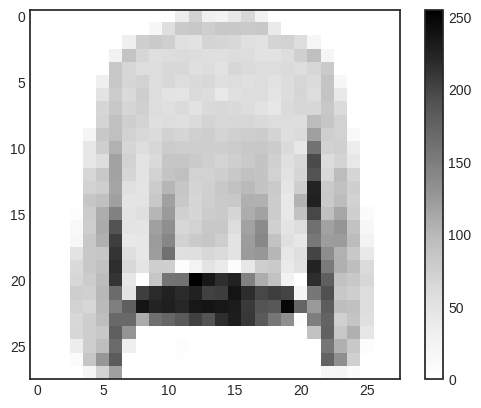

In [13]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

이제 여러개를 한번 띄어보자!

plt는 시각화 조건
plt.subplot(인자 확인, 왜 i+1?)

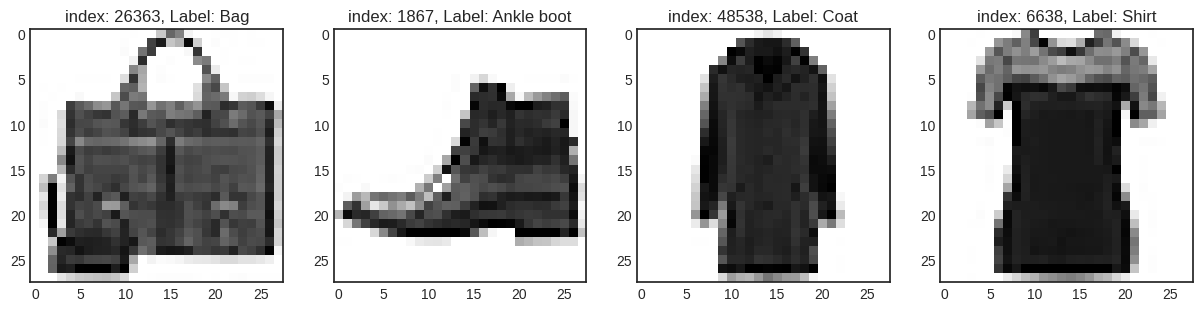

In [15]:
num_sample = 4

random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_idxs):
  image = x_train_full[idx, :]
  label = y_train_full[idx]

  plt.subplot(1, len(random_idxs), i+1)
  plt.imshow(image)
  plt.title('index: {}, Label: {}'.format(idx, class_names[label]))

데이터 전처리 과정!

x_train을 노멀라이즈 해주기 위해 reshape
255. 으로 나눠 주기 (nomalision)

아래와 같이 해서 전부 Flatten화 시키기
(Flatten 구조 함수)

In [16]:
x_train = (x_train.reshape(-1, 28*28)) / 255.
x_val = (x_val.reshape(-1, 28*28)) / 255.
x_test = (x_test.reshape(-1, 28*28)) / 255.

모델 구성(함수형 API)
784 > 크게 쓴다 : 이 의미 다시 한번 확인 모델 구성 중 크기 추측

변수 선언과 Dense(모델 함수), 그안의 숫자 의미 다시 확인 요망!

추측: 알고리즘 식으로 단계를 거쳐 내려오는 것 같다! (input = Input 대문자 i 주의!)

In [21]:
input = Input(shape=(784, ), name='input')
hidden1 = Dense(512, activation='relu', name='hidden1')(input)
hidden2 = Dense(256, activation='relu', name='hidden2')(hidden1)
hidden3 = Dense(128, activation='relu', name='hidden3')(hidden2)
hidden4 = Dense(64, activation='relu', name='hidden4')(hidden3)
hidden5 = Dense(32, activation='relu', name='hidden5')(hidden4)
output = Dense(10, activation='softmax', name='output')(hidden5)
model = Model(inputs=[input], outputs=output)

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 hidden1 (Dense)             (None, 512)               401920    
                                                                 
 hidden2 (Dense)             (None, 256)               131328    
                                                                 
 hidden3 (Dense)             (None, 128)               32896     
                                                                 
 hidden4 (Dense)             (None, 64)                8256      
                                                                 
 hidden5 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330 

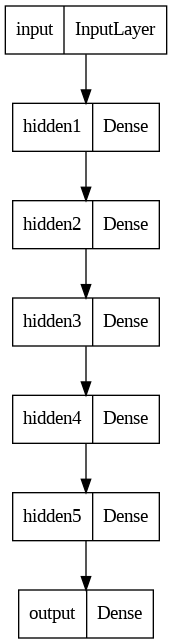

In [22]:
plot_model(model)

모델 컴파일 및 학습시키기!

loss 함수는 당연히 sparse로 범주용인데 원핫으로 안되어 있으니까! : 의미 재확인 요망!

In [24]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.01),
              metrics=['acc'])

학습 시키기 위해서 history 사용해서 fit 하기

In [25]:
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/40
83/83 [==============================] - 6s 46ms/step - loss: 1.1068 - acc: 0.6168 - val_loss: 0.5618 - val_acc: 0.8036
Epoch 2/40
83/83 [==============================] - 3s 40ms/step - loss: 0.4723 - acc: 0.8317 - val_loss: 0.5204 - val_acc: 0.8196
Epoch 3/40
83/83 [==============================] - 4s 53ms/step - loss: 0.4113 - acc: 0.8503 - val_loss: 0.3818 - val_acc: 0.8651
Epoch 4/40
83/83 [==============================] - 4s 45ms/step - loss: 0.3767 - acc: 0.8627 - val_loss: 0.9211 - val_acc: 0.7103
Epoch 5/40
83/83 [==============================] - 4s 53ms/step - loss: 0.4008 - acc: 0.8585 - val_loss: 0.4045 - val_acc: 0.8618
Epoch 6/40
83/83 [==============================] - 6s 68ms/step - loss: 0.3650 - acc: 0.8698 - val_loss: 0.5089 - val_acc: 0.8200
Epoch 7/40
83/83 [==============================] - 4s 47ms/step - loss: 0.3484 - acc: 0.8741 - val_loss: 0.3764 - val_acc: 0.8635
Epoch 8/40
83/83 [==============================] - 3s 41ms/step - loss: 0.3200 - a

모델 만든 것들 시각화 하기!
복사한 거라 전체적으로 재확인 요망!!
(1,2번째 코딩 key 가져오는 코드)

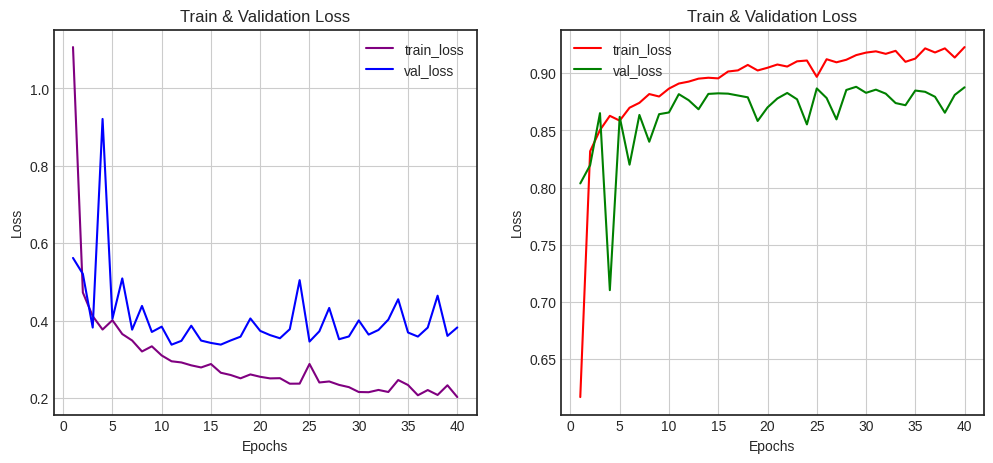

In [31]:
history.history.keys()
history_dict = history.history

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1 )
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='purple', label='train_loss')
ax1.plot(epochs, val_loss, color='blue', label='val_loss')
ax1.set_title('Train & Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['acc']
val_acc = history_dict['val_acc']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, accuracy, color='red', label='train_loss')
ax2.plot(epochs, val_acc, color='green', label='val_loss')
ax2.set_title('Train & Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.grid()
ax2.legend()

plt.show()


모델 평가 및 예측 해보기!

In [32]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4255 - acc: 0.8780


[0.42553719878196716, 0.878000020980835]

예측한 모델의 predict를 통해서 확인

In [33]:
pred_ys = model.predict(x_test)

print(pred_ys.shape)
np.set_printoptions(precision=7)
print(pred_ys[0])

313/313 [==============================] - 1s 3ms/step
(10000, 10)
[3.5562966e-10 8.3397644e-15 1.9807237e-08 5.9180154e-17 1.4112952e-07
 9.1658211e-07 2.1349952e-13 3.2010155e-07 3.5694447e-11 9.9999851e-01]


예측한 답 중 9.9 (99%) 답으로 확인(출력)해보기!
괄호 안에 숫자 의미 재확인 요망!
axis=number : 의미 확인 요망
agrmax, agrment 등 arg 뜻 확인 요망!

arg_pred_y[0] : 현재의 0번째 결과값

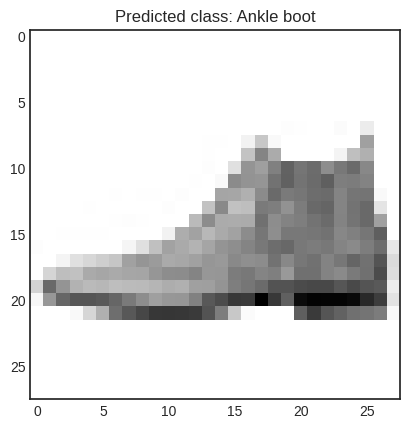

In [37]:
arg_pred_y = np.argmax(pred_ys, axis=1)
plt.imshow(x_test[0].reshape(-1, 28))
plt.title('Predicted class: {}'.format(class_names[arg_pred_y[0]]))

plt.show()


시각화를 예쁘게 만들어봅시다잉!
plot_image(i(self?), 예측한 결과, 테스트한 결과, 이미지 받기)

실제 값과 예측한 값과 비교해서 정답인지 눈으로 확인해보기 위함!

grid는 없애줘야함(False 처리..근데 왜함?)
x,yticks는 왜 없애주는거지? 빈칸처리

imshow(img, cmp(컬러맵 바이너리 형태/흑백이라서)

np.argmax(예측값 중 최대값)
if부터는 최대값의 위치를 가져오는 것!

2.0f : 소수점 2자리까지 표현

format(class_namesp[] : 실제 우리가 예측한 숫자를 넣어주기 위함

100*np.max(pred_ys) : %계산을 위함

class_names[y_test] : 실제 값도 class_name으로 바꿔주기 위함

def plot_value_array(i, pred_ys, true_label): 인자 2개를 보여줄게요
pred_ys, true_label = pred_ys[i], true_label[i] : i번째 true label 가져오게 하기 
    
plt.grid(False) : 아래 세줄은 안써서 지워!
plt.xticks([])
plt.yticks([])

thisplot = plt.bar(range(10), pred_ys, color='#777777') : 지금 바로 보여줄거양!
plt.ylim([0,1]) : y축의 범위
predicted_label = np.argmax(pred_ys)


In [45]:
def plot_image(i, pred_ys, y_test, img):
  pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(pred_ys)
  if predicted_label == y_test:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{}{:2.0f}% ({})".format(class_names[predicted_label],
                                      100*np.max(pred_ys),
                                      class_names[y_test]), color=color)
  
def plot_value_array(i, pred_ys, true_label):
            pred_ys, true_label = pred_ys[i], true_label[i]
            plt.grid(False)
            plt.xticks([])
            plt.yticks([])
            thisplot = plt.bar(range(10), pred_ys, color='#777777')
            plt.ylim([0,1])
            predicted_label = np.argmax(pred_ys)

            thisplot[predicted_label].set_color('red')
            thisplot[true_label].set_color('blue')
            

위 코드 실행해보기!
plt.figure(figsize=(8,4)) : 피규어 사이즈
plt.subplot(1,2,1) : 왼쪽것부터
plot_image(i, pred_ys, y_test, 

x_test.reshape(-1,28,28)) : y 인자들 넣어서 출력, 함수 x_test reshape 필요함(모델을 784로 펼쳤었기 때문에 이미지 모양이 되도록 만듬)

plot_value_array(i, pred_ys, y_test) : bar 의 형태로 보여주기 위해 

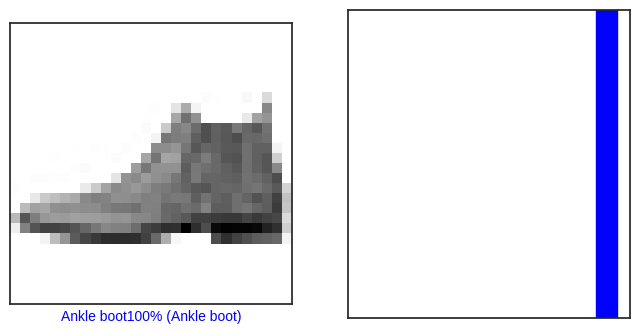

In [46]:
i = 0
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1,28,28))
plt.subplot(1,2,2)
plot_value_array(i, pred_ys, y_test)
plt.show()

i 가 40번째도 잘하는지 확인해보자!

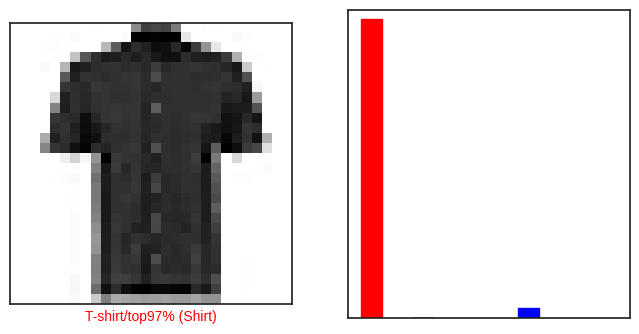

In [47]:
i = 40
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1,28,28))
plt.subplot(1,2,2)
plot_value_array(i, pred_ys, y_test)
plt.show()

한번에 여러개 띄어서 출력해보자아!

rows, cols 행열 모양 만들어주고 반복문 작성
plot 함수 2개 호출!
plot_value~ 바형태의 이미지 출력 함수!

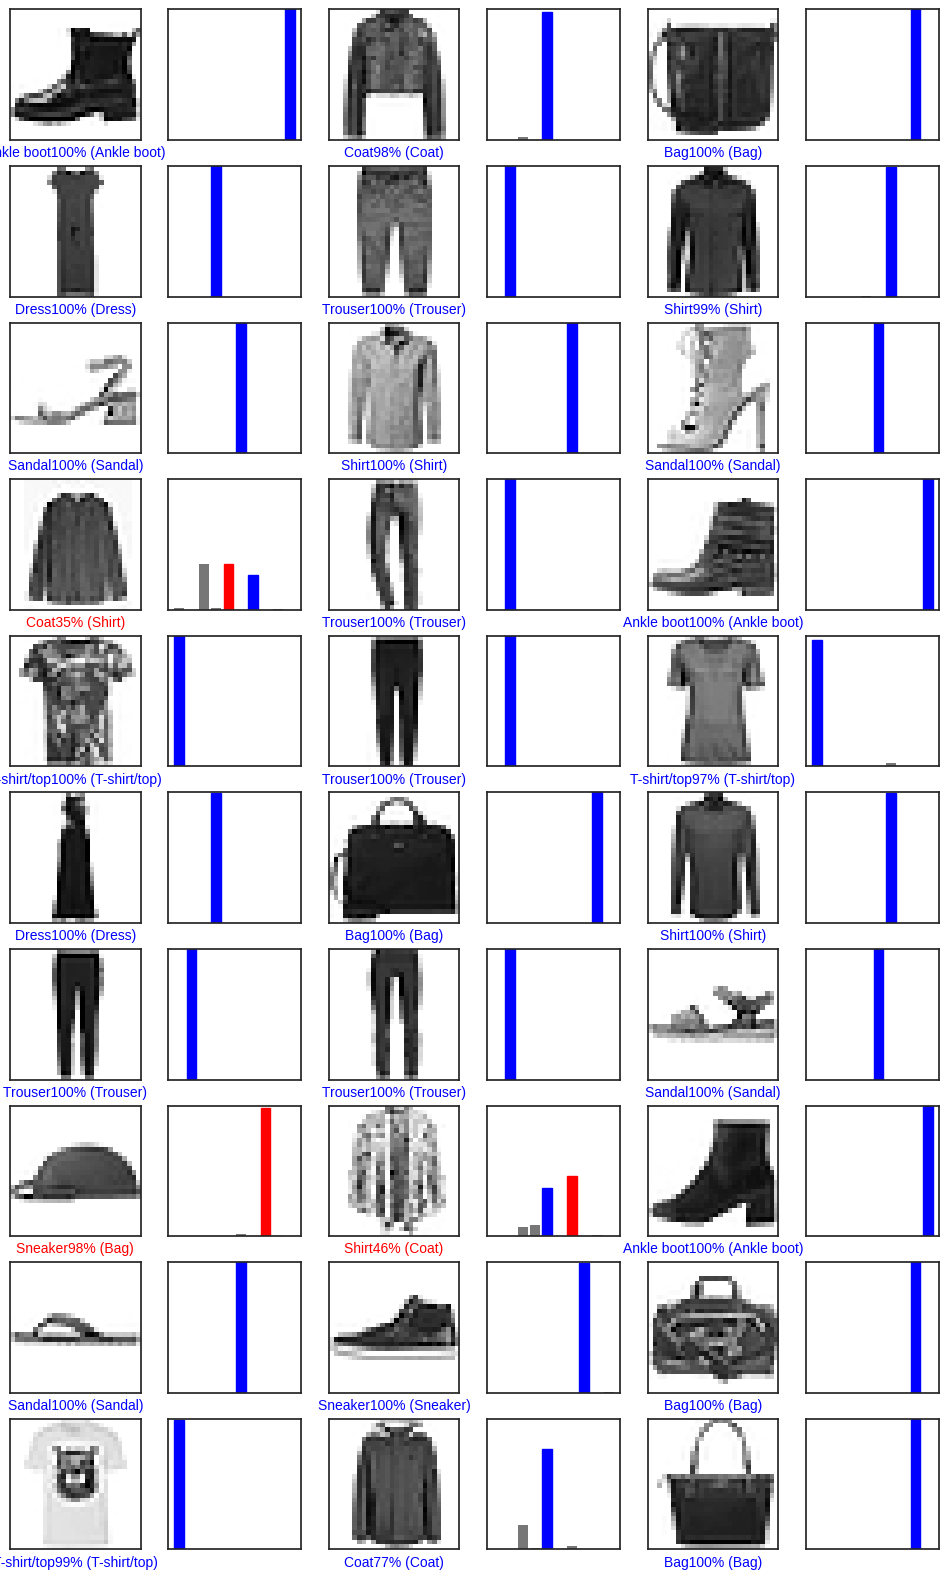

In [48]:
num_rows = 10
num_cols = 3
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for idx, num in enumerate(random_num):
  plt.subplot(num_rows, 2*num_cols, 2*idx + 1)
  plot_image(num, pred_ys, y_test, x_test.reshape(-1,28,28))
  plt.subplot(num_rows, 2*num_cols, 2*idx + 2)
  plot_value_array(num, pred_ys, y_test)

plt.show()

혼동 행렬 작성!

from keras.utils import categorical 한 이유는 카테고리로 바꿔줘야 함? 이거 왜 하쥬?

In [49]:
from tensorflow.keras.utils import to_categorical

y_test_che = to_categorical(y_test)
y_test_che.shape

(10000, 10)

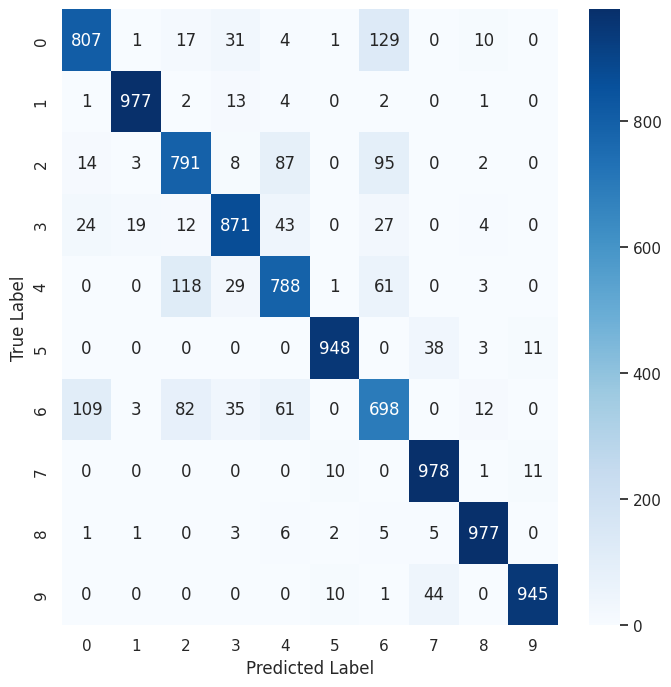

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(8,8))
cm = confusion_matrix(np.argmax(y_test_che, axis=1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

최종!! 분류보고서 작성해보기

In [54]:
print(classification_report(np.argmax(y_test_che, axis=-1), np.argmax(pred_ys, axis=-1)))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1000
           1       0.97      0.98      0.98      1000
           2       0.77      0.79      0.78      1000
           3       0.88      0.87      0.88      1000
           4       0.79      0.79      0.79      1000
           5       0.98      0.95      0.96      1000
           6       0.69      0.70      0.69      1000
           7       0.92      0.98      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

